In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('amazon_database.csv')
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?

In [6]:
df['category'].describe()

count               2443651
unique                  296
top       Sports & Outdoors
freq                 836265
Name: category, dtype: object

In [7]:
df['category'].isna().sum()

0

In [8]:
df_v=df.category.value_counts().head()
df_v.head()
#Esto nos dice los cinco mas gustados

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [9]:

frecuency=df.category.value_counts().head()
frecuency.head()

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

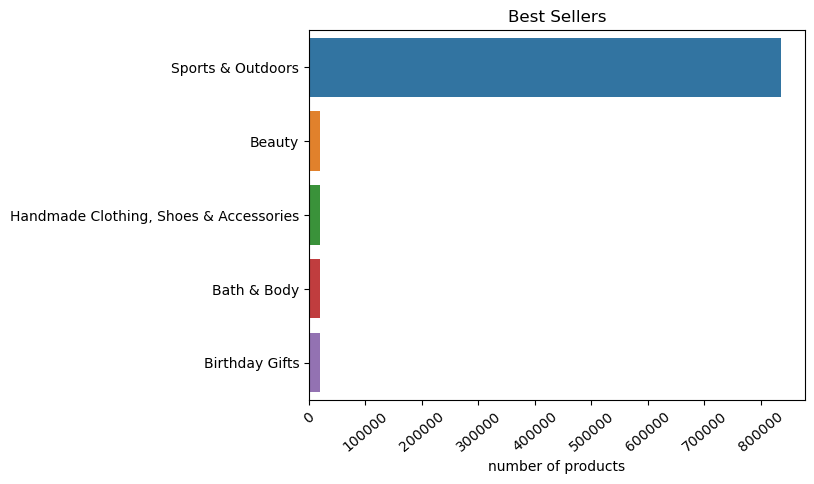

In [10]:
sns.barplot(y=frecuency.index,x=frecuency.values)
plt.xticks(rotation=40)
plt.title('Best Sellers')
plt.ylabel('')
plt.xlabel('number of products')
plt.show

ValueError: 'explode' must be of length 'x'

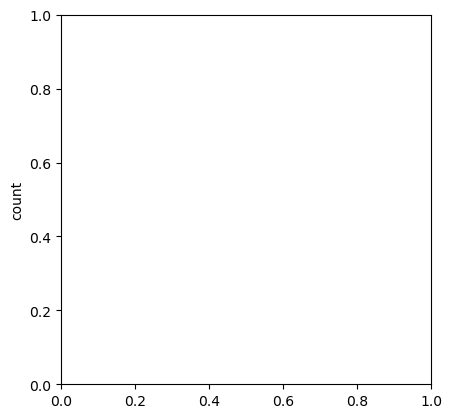

In [11]:
frecuency.plot.pie( startangle=90, autopct="%1.2f%%",explode=(0,0.2,0))
ylabel= ''
xlabel=''

<Axes: ylabel='count'>

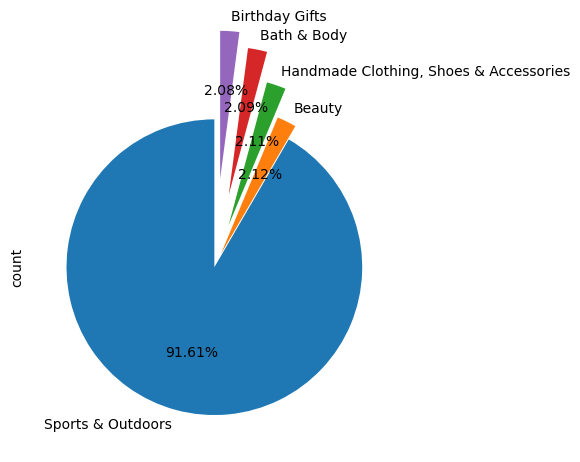

In [ ]:
frecuency.plot.pie(startangle=90, autopct="%1.2f%%", explode=(0,0.1,0.3,0.5,0.6))

In [ ]:
np.percentile(df.price,25)

9.99

Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?


In [ ]:
df[['price']].describe().round().T

,count,mean,std,min,25%,50%,75%,max
price,2443651.0,89.0,346.0,0.0,10.0,19.0,46.0,100000.0


In [ ]:
# el salto cuantitativo entre la media y la moda indica mucha disparidad o algun valor o "outlier"

In [ ]:
standard_deviation=df.price.max()-df.price.min()
#desvaicion estandar, un poco inutil viendo que lo que da probleams es que el valor minimo sea el 0

100000.0

Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?
Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.


In [ ]:

pd.qcut(df['price'],q=4).head(20)

0        (19.09, 45.99]
1        (19.09, 45.99]
2        (19.09, 45.99]
3        (19.09, 45.99]
4         (9.99, 19.09]
5        (19.09, 45.99]
6        (19.09, 45.99]
7        (19.09, 45.99]
8        (19.09, 45.99]
9        (19.09, 45.99]
10    (45.99, 100000.0]
11        (9.99, 19.09]
12        (9.99, 19.09]
13    (45.99, 100000.0]
14    (45.99, 100000.0]
15       (19.09, 45.99]
16       (19.09, 45.99]
17       (19.09, 45.99]
18    (45.99, 100000.0]
19    (45.99, 100000.0]
Name: price, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 9.99] < (9.99, 19.09] < (19.09, 45.99] < (45.99, 100000.0]]

In [ ]:
bins = [0, 10, 30, 50, df['price'].max()]
labels = ['Low', 'Medium', 'High', 'Very High']

In [ ]:
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels)


In [ ]:
df.price_category


0             Medium
1             Medium
2             Medium
3               High
4             Medium
             ...    
2443646       Medium
2443647    Very High
2443648    Very High
2443649    Very High
2443650    Very High
Name: price_category, Length: 2443651, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']

In [ ]:
valores_2= df.price_category.value_counts()

<Axes: xlabel='price_category'>

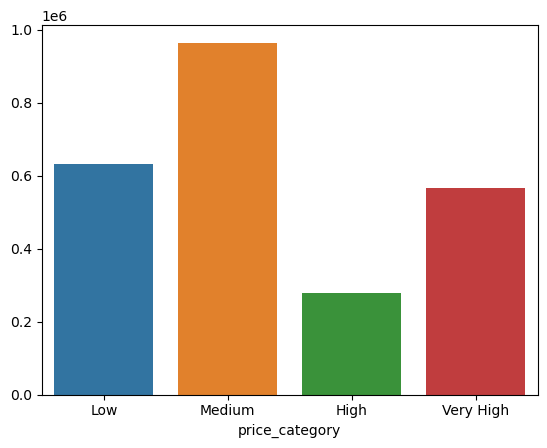

In [ ]:
sns.barplot(x= valores_2.index,y=valores_2.values)


Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?


In [14]:
df['reviews'].describe().round()

count    2443651.0
mean         481.0
std         5944.0
min            0.0
25%            0.0
50%            0.0
75%           59.0
max      1356658.0
Name: reviews, dtype: float64

In [ ]:
# people rend to review either 0 stars or favourably the products regardless of quality,  setting up a chart, shows  and reinforces 
# what we see in the quartiles 

Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?

In [19]:
df['reviews'].std()

5944.124150942261

Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?


In [13]:
df_3= df[['price']].head(50)

<Axes: >

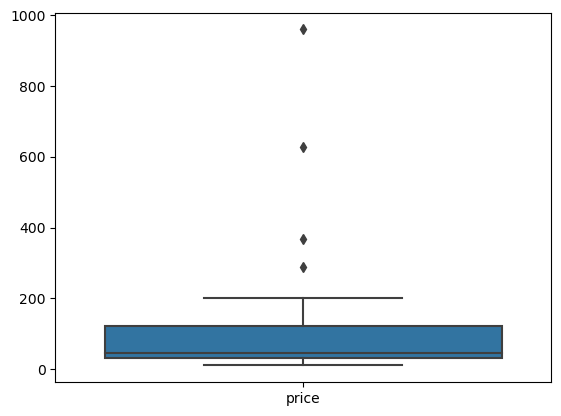

In [16]:
sns.boxplot(df_3)

<Axes: xlabel='reviews', ylabel='Count'>

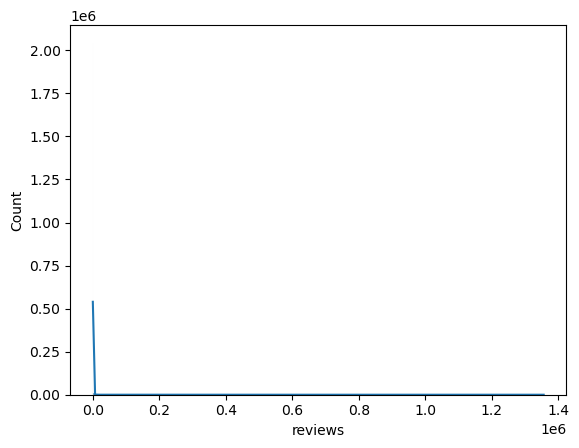

In [21]:

sns.histplot(df['reviews'], kde=True,binwidth=200)

In [21]:
df_5=df[df['reviews']!=0]

In [22]:
df_5

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443642,2828585,B07DCFQMQL,Speed MaxX BODY ARMOUR CE MOTORBIKE/MOTORCYCLE...,3.6,66,49.99,False,0,Motorbike Clothing
2443643,2828586,B07JM5VQFX,Motorcycle Clothing Suit - Motorbike Suit With...,4.1,5,158.99,False,0,Motorbike Clothing
2443644,2828587,B07X98JLFF,GREAT BIKERS GEAR - Bobber Cafe Brat Style Lea...,3.6,12,14.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


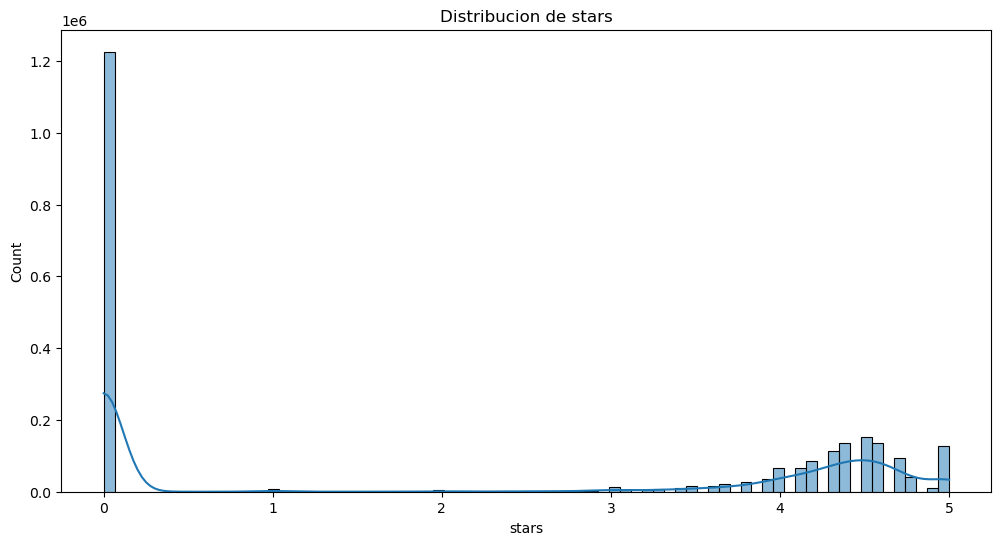

In [25]:
plt.figure(figsize=(12, 6))

sns.histplot(data=df.stars, kde=True)

plt.title('Distribucion de stars')

plt.show();

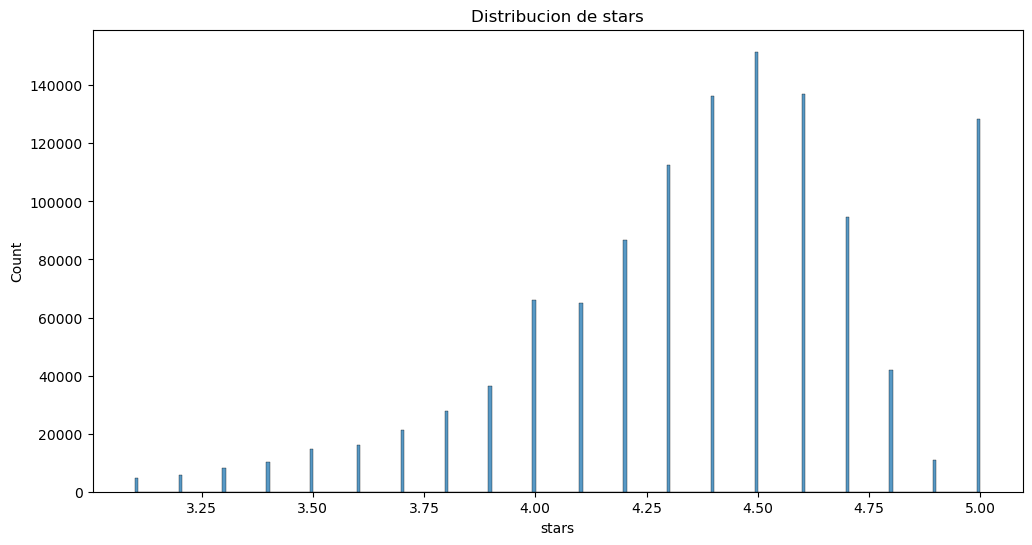

In [26]:

plt.figure(figsize=(12, 6))

sns.histplot(data=df[df.stars>3].stars)

plt.title('Distribucion de stars')

plt.show();

After studying and correcting the data we found out that we should divide the data based on wether it has stars or not.